Author: Nik Alleyne<br>
Author Blog:    https://www.securitynik.com <br>
Author GitHub:  github.com/securitynik <br>
Author Books: 
        [ 
                
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"
        ]


## 26 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious

This notebook was built specifically at the request of one of my students, taking the SANS SEC595 class at SANS Security West, June 2023. <br>
https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ <br>

### The request: <br>
Put together a notebook, on how an executable can be read and place into a numpy array. <br>

In this notebook, I've done that, as well as built models using machine and deep learning frameworks. Specifically, sklearn, tensorflow and pytorch.

Enjoy!

In [1]:
# Read some necessary libraries
import numpy as np
import os
import glob

In [2]:
# Create a list to store the executable file paths
exe_files_list = []

# Append the file and paths in a particular directory to the list
for file_name in glob.glob(pathname='d:/TOOLS/*.exe'):
    print(f'[*] Appending {file_name} to exe_files_list')

    # Adding the files to the list
    exe_files_list.append(file_name)

print(f'Added {len(exe_files_list)} files')

[*] Appending d:/TOOLS\7z1604-x64.exe to exe_files_list
[*] Appending d:/TOOLS\7z1604.exe to exe_files_list
[*] Appending d:/TOOLS\7z1801-x64.exe to exe_files_list
[*] Appending d:/TOOLS\7z1805.exe to exe_files_list
[*] Appending d:/TOOLS\7z1900-x64.exe to exe_files_list
[*] Appending d:/TOOLS\7z1900.exe to exe_files_list
[*] Appending d:/TOOLS\AccessData_FTK_Imager-_4.3.0.exe to exe_files_list
[*] Appending d:/TOOLS\AnalyzePESig.exe to exe_files_list
[*] Appending d:/TOOLS\bintext.exe to exe_files_list
[*] Appending d:/TOOLS\burpsuite_community_windows-x64_v2_1_07.exe to exe_files_list
[*] Appending d:/TOOLS\ca_setup.exe to exe_files_list
[*] Appending d:/TOOLS\CFF_ExplorerSuite.exe to exe_files_list
[*] Appending d:/TOOLS\chml.exe to exe_files_list
[*] Appending d:/TOOLS\ChromeSetup.exe to exe_files_list
[*] Appending d:/TOOLS\ChromeStandaloneSetup64.exe to exe_files_list
[*] Appending d:/TOOLS\ciHexViewer.exe to exe_files_list
[*] Appending d:/TOOLS\codeblocks-20.03-setup.exe to exe

In [3]:
# Review the list 
exe_files_list

['d:/TOOLS\\7z1604-x64.exe',
 'd:/TOOLS\\7z1604.exe',
 'd:/TOOLS\\7z1801-x64.exe',
 'd:/TOOLS\\7z1805.exe',
 'd:/TOOLS\\7z1900-x64.exe',
 'd:/TOOLS\\7z1900.exe',
 'd:/TOOLS\\AccessData_FTK_Imager-_4.3.0.exe',
 'd:/TOOLS\\AnalyzePESig.exe',
 'd:/TOOLS\\bintext.exe',
 'd:/TOOLS\\burpsuite_community_windows-x64_v2_1_07.exe',
 'd:/TOOLS\\ca_setup.exe',
 'd:/TOOLS\\CFF_ExplorerSuite.exe',
 'd:/TOOLS\\chml.exe',
 'd:/TOOLS\\ChromeSetup.exe',
 'd:/TOOLS\\ChromeStandaloneSetup64.exe',
 'd:/TOOLS\\ciHexViewer.exe',
 'd:/TOOLS\\codeblocks-20.03-setup.exe',
 'd:/TOOLS\\cola_soft_pktbuilder_2.0.0.212.exe',
 'd:/TOOLS\\Comodo-ForensicAnalysisTool_MzUxNDQx.exe',
 'd:/TOOLS\\DeleteRecordofFileEx.exe',
 'd:/TOOLS\\devcpp-4.9.9.2_setup.exe',
 'd:/TOOLS\\DiskImageFreeSetup.exe',
 'd:/TOOLS\\DokanSetup.exe',
 'd:/TOOLS\\dotNetFx45_Full_setup.exe',
 'd:/TOOLS\\EventExplorer_setup.exe',
 'd:/TOOLS\\ExplorerSuite.exe',
 'd:/TOOLS\\filealyz-2.0.5.57.exe',
 'd:/TOOLS\\findjump2.exe',
 'd:/TOOLS\\Firefox Setup

In [4]:
# Take a sample file
# This produces the following output for the first 8 bytes
# Note, change the values below if you wish to see more bytes
# I'm using 8 for easier clarity of the output

# We need to get out of this binary format
f = open(file=exe_files_list[0], mode='rb')
f.read(8)

b'MZ\x90\x00\x03\x00\x00\x00'

In [5]:
# Let's get these values into hex
# https://stackoverflow.com/questions/6624453/whats-the-correct-way-to-convert-bytes-to-a-hex-string-in-python-3
# https://docs.python.org/3/library/stdtypes.html#bytes.hex
# This output looks much better.
# Now that they are in hex, we need to get this as int
f = open(file=exe_files_list[0], mode='rb')
f.read(8).hex(sep=' ', bytes_per_sep=1)

'4d 5a 90 00 03 00 00 00'

In [6]:
# Read the data from a sample file
f = open(file=exe_files_list[0], mode='rb')

# Read 8 bytes of the data, convert the binary data to hex with 2 characters representing a byte
# Remember, you can change the 8 to 256 or some other value if you wish
# split the data on the space to setup a list of hex chars
bytes_to_hex = f.read(8).hex(sep=' ', bytes_per_sep=1).split(' ')
print(bytes_to_hex)

['4d', '5a', '90', '00', '03', '00', '00', '00']


In [7]:
# While the above is in a list, it is all hex string.
# Still need to get this to int
# https://www.rapidtables.com/convert/number/hex-to-decimal.html

# Convert each item in the list to a 16 bit integer
[ int(i, 16) for i in bytes_to_hex ]

[77, 90, 144, 0, 3, 0, 0, 0]

In [8]:
# Knowing that above works, let's now get this into a numpy array
# Put above in an numpy array
# This gives us what we need. We have the foundation in place to now put everything together
np.array([ int(i, 16) for i in bytes_to_hex ])

array([ 77,  90, 144,   0,   3,   0,   0,   0])

In [9]:
# Putting together, all that was done above

# Define an empty list
exe_array = []

# First create a for loop consisting of all that we just defined
for file in exe_files_list:
    # print the file if needed
    # print(file)

    # Read the data from a sample file as binary data
    f = open(file=file, mode='rb')

    # Read 8 bytes of the data, convert the binary data to hex with 2 characters representing a byte
    # You can change the 8 below in the read statement to read a larger number of bytes
    # I'm trying to make it easily readable
    # split the data on the space to setup a list of hex chars
    bytes_to_hex = f.read(8).hex(sep=' ', bytes_per_sep=1).split(' ')

    # Convert the hex characters to 16 bits integer
    xi = ([ int(i, 16) for i in bytes_to_hex ])

    # Append the integers to the exe_array
    exe_array.append(xi)

In [10]:
# Review the array with the items
print(exe_array)

[[77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 96, 0, 1, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 144, 0, 3, 0, 4, 0], [77, 90, 144, 0, 3, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2, 0, 0, 0], [77, 90, 80, 0, 2,

In [11]:
# make the list into a numpy array
X = np.array(object=exe_array, dtype=float)
X

array([[ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,   2.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,

In [12]:
# Get the shape of X_train
# This tells us the number of samples executables and the number of bytes 
X.shape

(61, 8)

With the executables now available in a format we can use for machine and deep learning <br> 
and since there are no labels, we can use anomaly, outlier or novelty detection via sklearn. <br>
See this link: https://scikit-learn.org/stable/modules/outlier_detection.html <br><br>

If you wish to do anomaly detection via autoencoder,<br>
see this link: https://www.tensorflow.org/tutorials/generative/autoencoder#third_example_anomaly_detection

In [13]:
# Prepare to save the numpy array above
import joblib

In [14]:
# Save the executables numpy array to a  file
joblib.dump(value=X, filename='exe_file_array.npy')

['exe_file_array.npy']

In [15]:
# load the file containing the numpy array of the executables
loaded_np_array = joblib.load(filename='exe_file_array.npy')
loaded_np_array

array([[ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,   2.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,

Generate some random labels for the purpose of this notebook <br>
Note, I'm not aware of any of the files uses her being malicious. <br>
But because I wish to demonstrate supervise learning, I will add some random labels <br>

In [16]:
# Generate some random labels/targets for a binary classification problem
y = np.random.randint(low=0, high=2, size=X.shape[0])
y

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [17]:
# Remember, y needs to be reshaped as a new column to be able to stack horizontally
# via a 
y.reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [18]:
# Stack the two to create a dataframe if needed
np.hstack(tup=(X, y.reshape(-1, 1)))

array([[ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90.,  80.,   0.,   2.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   0.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,   1.],
       [ 77.,  90., 144.,   0.,   3.,   0.,   0.,   0.,

In [19]:
# With that in place, let's build a quick machine learning model to do supervised learning
from sklearn.linear_model import LogisticRegression

In [20]:
# Setup a machine learning model using Logistic Regression
lr = LogisticRegression().fit(X=X, y=y)
lr

LogisticRegression()

In [21]:
# How did the model do on the training set?
# Get some metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [22]:
# Get the accuracy score on the training data
accuracy_score(y_true=y, y_pred=lr.predict(X=X))

0.5573770491803278

In [23]:
# Prettify the confusion matrix
import seaborn as sns

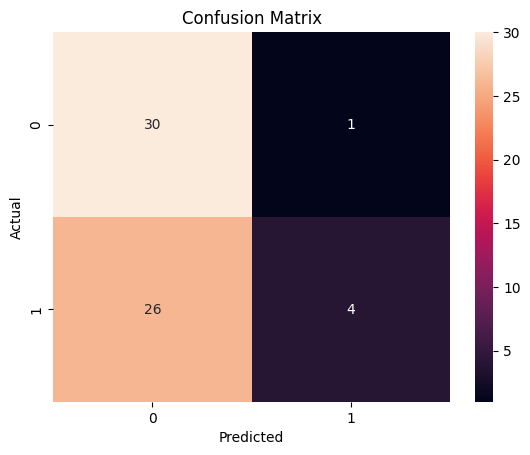

In [24]:
# Get the confusion matrix
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=lr.predict(X=X)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# Print the classification report
print(classification_report(y_true=y, y_pred=lr.predict(X=X)))

              precision    recall  f1-score   support

           0       0.54      0.97      0.69        31
           1       0.80      0.13      0.23        30

    accuracy                           0.56        61
   macro avg       0.67      0.55      0.46        61
weighted avg       0.67      0.56      0.46        61



In [26]:
# Let's wrap this up by build a quick neural network
import tensorflow as tf

In [27]:
# Setup a neural network
model = tf.keras.Sequential(name='exe_sequential')

# Setup the input layer
model.add(tf.keras.layers.Input(shape=(X.shape[1],), name='exe_input_layer' ))

# Add one dense layer
model.add(tf.keras.layers.Dense(units=8, activation='relu', use_bias=True, name='hidden_layer'))

# Add a dropout layer for regularization. Drop 20 percent of the neurons
model.add(tf.keras.layers.Dropout(rate=0.2))

# Add the final output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name='output_layer'))

model.summary()

Model: "exe_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


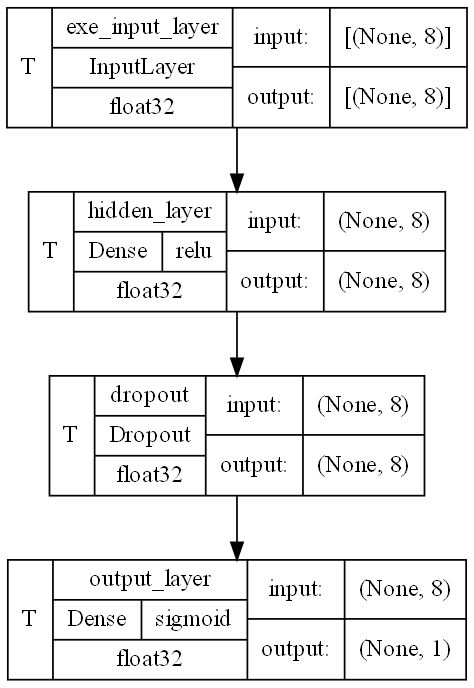

In [29]:
# Get a diagram of the model
tf.keras.utils.plot_model(model=model, show_dtype=True, show_layer_activations=True, \
                          show_layer_names=True, show_shapes=True, show_trainable=True, dpi=125)

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Fit the model
history = model.fit(x=X, y=y, epochs=10, verbose=1, callbacks=None, validation_split=0.2, shuffle=True)

Epoch 1/10
2/2 [==============================] - 1s 316ms/step - loss: 9.6937 - accuracy: 0.4792 - val_loss: 5.4689 - val_accuracy: 0.6923
Epoch 2/10
2/2 [==============================] - 0s 81ms/step - loss: 8.1215 - accuracy: 0.4375 - val_loss: 5.2315 - val_accuracy: 0.6923
Epoch 3/10
2/2 [==============================] - 0s 121ms/step - loss: 8.6886 - accuracy: 0.4583 - val_loss: 4.9931 - val_accuracy: 0.6923
Epoch 4/10
2/2 [==============================] - 0s 73ms/step - loss: 8.9753 - accuracy: 0.5000 - val_loss: 4.7538 - val_accuracy: 0.6923
Epoch 5/10
2/2 [==============================] - 0s 64ms/step - loss: 8.6007 - accuracy: 0.4375 - val_loss: 4.5157 - val_accuracy: 0.6923
Epoch 6/10
2/2 [==============================] - 0s 57ms/step - loss: 8.7972 - accuracy: 0.4583 - val_loss: 4.2806 - val_accuracy: 0.6923
Epoch 7/10
2/2 [==============================] - 0s 38ms/step - loss: 8.2875 - accuracy: 0.4583 - val_loss: 4.0504 - val_accuracy: 0.6923
Epoch 8/10
2/2 [=========

In [32]:
# What does the history callback look like?
history.history

{'loss': [9.693672180175781,
  8.121475219726562,
  8.68862533569336,
  8.975271224975586,
  8.600678443908691,
  8.79721450805664,
  8.287476539611816,
  7.451620578765869,
  6.796202182769775,
  7.356996536254883],
 'accuracy': [0.4791666567325592,
  0.4375,
  0.4583333432674408,
  0.5,
  0.4375,
  0.4583333432674408,
  0.4583333432674408,
  0.3958333432674408,
  0.4583333432674408,
  0.4791666567325592],
 'val_loss': [5.468931198120117,
  5.231455326080322,
  4.993106365203857,
  4.753774642944336,
  4.515742301940918,
  4.280590534210205,
  4.050359725952148,
  3.824174642562866,
  3.600847005844116,
  3.376765727996826],
 'val_accuracy': [0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583,
  0.692307710647583]}

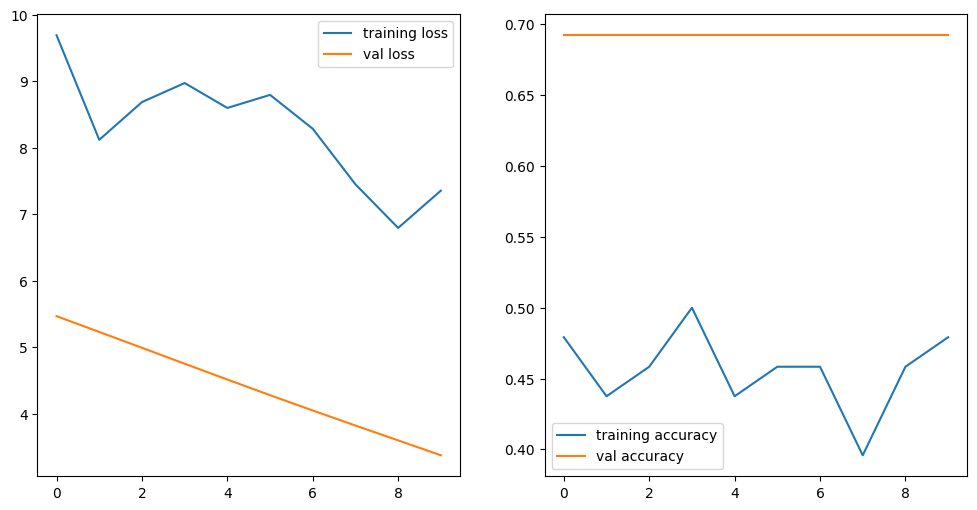

In [33]:
# Plot the loss and accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(history.history['loss'], label='training loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='training accuracy')
ax2.plot(history.history['val_accuracy'], label='val accuracy')
ax2.legend()

In [34]:
# Create deep learning model with PyTorch
import torch
import torchinfo

In [35]:
# Setup a torch model using the Sequential Class
torch_clf_model = torch.nn.Sequential(
    torch.nn.Linear(in_features=X.shape[1], out_features=8),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(in_features=8, out_features=1),
    torch.nn.Sigmoid()
)

In [36]:
# Get the summary of the model
torchinfo.summary(torch_clf_model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            72
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            9
├─Sigmoid: 1-5                           --
Total params: 81
Trainable params: 81
Non-trainable params: 0

In [37]:
# We need to change our data into a Torch Tensor
# Currently it is in 
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [38]:
# To use the data in pytorch we need to change it to a torch tensor. 
# Ensure the data types are all the same
X = torch.tensor(data=X, dtype=torch.float32)

# Notice the reshaping of y also
y = torch.tensor(data=y.reshape(-1,1), dtype=torch.float32)

# Validate the change
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [39]:
# In the following notebooks:
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch
#   15. Beginning Deep Learning, - Linear Regression, PyTorch
# the training was all done outside of a function. Rather than rewriting the same code all the time
# time to create a function
def torch_training(model=None, epochs=10, learning_rate=0.01, x_train=X, y_train=y, x_test=X, y_test=y):
    ''' Performs training of the model '''
    # Create to lists to save the training and test loss respectively 
    training_loss, validation_loss = [], []

    # Setup the loss function
    clf_loss_fn = torch.nn.BCELoss()

    # Setup the optimizer
    clf_optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    
    for epoch in range(epochs):
        # Clear the gradients
        clf_optimizer.zero_grad()

        # Train the model
        model.train()

        # Make predictions on the training data
        train_preds = model(x_train)
    
        # Get the loss
        train_loss = clf_loss_fn(train_preds, y_train)
        training_loss.append(train_loss)

        # Calculate the gradients
        train_loss.backward()

        # Upgrade the gradients
        clf_optimizer.step()

        # Evaluate the model at the same time
        model.eval()
        with torch.inference_mode():
            val_preds = model(X)

            # Calculate the loss on the validation data
            val_loss = clf_loss_fn(val_preds, y_test)
            validation_loss.append(val_loss)

        if epoch %10 == 0:
            print(f'Epoch: {epoch} \t training loss: {train_loss} \t validation loss {val_loss}')
    
    return model, training_loss, validation_loss

In [40]:
# Call the function with the associated parameters
#(model, train_loss, val_loss) = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)
torch_clf_model = torch_training(model=torch_clf_model, epochs=300, learning_rate=0.01)

Epoch: 0 	 training loss: 7.139605522155762 	 validation loss 1.3621224164962769
Epoch: 10 	 training loss: 1.9437975883483887 	 validation loss 0.6905624866485596
Epoch: 20 	 training loss: 1.0768537521362305 	 validation loss 0.6858198046684265
Epoch: 30 	 training loss: 0.7596549391746521 	 validation loss 0.6984313130378723
Epoch: 40 	 training loss: 0.6841555237770081 	 validation loss 0.6899130344390869
Epoch: 50 	 training loss: 0.6884319186210632 	 validation loss 0.6867681741714478
Epoch: 60 	 training loss: 0.6891920566558838 	 validation loss 0.6867013573646545
Epoch: 70 	 training loss: 0.6931138634681702 	 validation loss 0.6895712614059448
Epoch: 80 	 training loss: 0.6890212297439575 	 validation loss 0.6889299750328064
Epoch: 90 	 training loss: 0.6848458647727966 	 validation loss 0.6871081590652466
Epoch: 100 	 training loss: 0.6857194304466248 	 validation loss 0.6871017813682556
Epoch: 110 	 training loss: 0.6950904726982117 	 validation loss 0.6870294809341431
Epoc

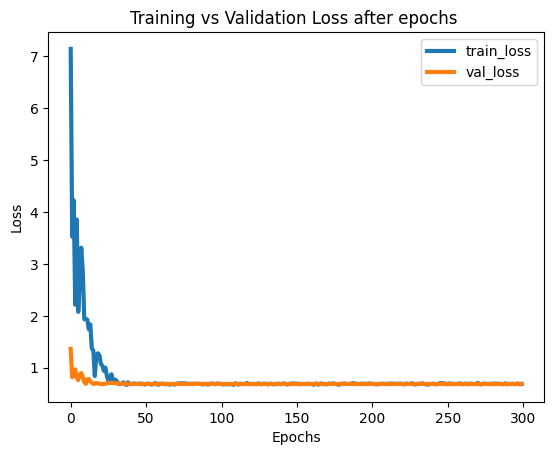

In [41]:
# Plotting the training loss values
plt.title(f'Training vs Validation Loss after epochs ')

# Trying to plot on the "training_loss" by itself will not work
# Matplotlib will more than likely throw an error
# Hence we needed to do "torch.tensor(training_loss).detach().numpy()"
plt.plot(torch.tensor(torch_clf_model[1]).detach().numpy(), lw=3, label='train_loss')
plt.plot(torch.tensor(torch_clf_model[2]).detach().numpy(), lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
# Make predictions on the test set
# We see the values are continuous
with torch.inference_mode():
    test_preds = torch_clf_model[0](X)

test_preds

tensor([[0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.4272],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.4272],
        [0.5244],
        [0.5303],
        [0.5303],
        [0.4272],
        [0.5303],
        [0.5303],
        [0.4272],
        [0.4272],
        [0.4272],
        [0.5303],
        [0.5303],
        [0.5288],
        [0.5303],
        [0.4272],
        [0.4272],
        [0.4272],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5303],
        [0.5275],
        [0.5303],
        [0.4272],
        [0.5259],
        [0.5275],
        [0.5303],
        [0.5303],
        [0.4272],
        [0.5303],
        [0.4272],
        [0.5303],
        [0.4272],
        [0

In [43]:
# Notice the rounding of the predictions
# Above we got the probabilities. Can't use the probabilities here
accuracy_score(y_true=y, y_pred=np.round(test_preds))

0.5409836065573771

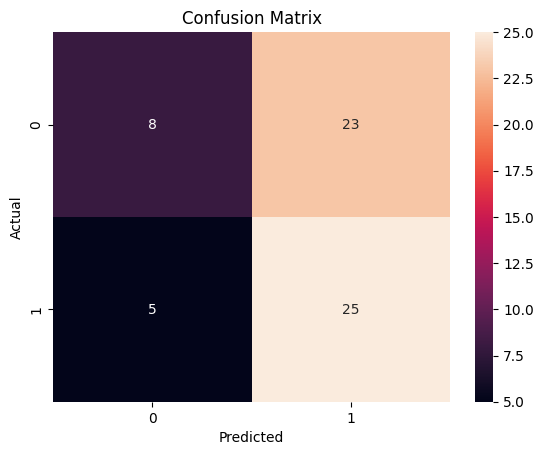

In [44]:
# Looking at the confusion matrix, This does not seem so bad
# We learned about metrics in notebook:
#   10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics
sns.heatmap(confusion_matrix(y_true=y, y_pred=np.round(test_preds)), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
# Review the classification report
print(classification_report(y_true=y, y_pred=np.round(test_preds)))

              precision    recall  f1-score   support

         0.0       0.62      0.26      0.36        31
         1.0       0.52      0.83      0.64        30

    accuracy                           0.54        61
   macro avg       0.57      0.55      0.50        61
weighted avg       0.57      0.54      0.50        61



In [ ]:
# Well that's it!